# Data Description
| Variable Name | Description | Type |
|----------|----------|----------|
| SeriousDlqin2yrs | Person experienced 90 days past due delinquency or worse   | Y/N |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age | Age of borrower in years |	integer |
| NumberOfTime30-59DaysPastDueNotWorse	| Number of times borrower has been 30-59 days past due but no worse in the last 2 years	| integer |
| DebtRatio	| Monthly debt payments, alimony, living costs divided by monthy gross income |	percentage |
| MonthlyIncome	| Monthly income	| real |
|NumberOfOpenCreditLinesAndLoans	| Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)	| integer |
|NumberOfTimes90DaysLate	| Number of times borrower has been 90 days or more past due	| integer |
|NumberRealEstateLoansOrLines	| Number of mortgage and real estate loans including home equity lines of credit	| integer |
|NumberOfTime60-89DaysPastDueNotWorse	| Number of times borrower has been 60-89 days past due but no worse in the last 2 years	| integer |
|NumberOfDependents	| Number of dependents in family excluding themselves (spouse, children etc.)	| integer |



**Target: SeriousDlqin2yrs**

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np

TRAINING = pd.read_csv('cs-training.csv')

RANDOM_STATE = 42

In [2]:
TRAINING.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [3]:
TRAINING.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

В признаках **MonthlyIncome** и **NumberOfDependents** есть много пропущенных значений. Заполним их дальше по ноутбуку.

In [4]:
TRAINING.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


В данных также присутствуют признаки, которые могут давать схожую информацию: **NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTimes90DaysLate** и **NumberOfTime60-89DaysPastDueNotWorse** или **NumberOfOpenCreditLinesAndLoans** и **NumberRealEstateLoansOrLines**. Посмотрим на их корреляцию по ходу анализа данных.

Также, если мы выделим возраст, который выходит за пределы 18-100 лет, то сможем заметить, что в данных есть явный выброс с возрастом 0 лет, исправим его в зависимости от распределения значений этого признака. Возраст больше 100 лет возможен, так что не будем засчитывать такие значения за выбросы.

In [5]:
TRAINING.loc[TRAINING['age'] < 18]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [6]:
TRAINING.loc[TRAINING['age'] > 100]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7763,7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0.0
19884,19885,0,1.000000,103,0,0.000000,1600.0,3,0,0,0,0.0
25561,25562,0,0.009866,102,0,0.002424,3300.0,3,0,0,0,0.0
40007,40008,0,0.064748,107,0,939.000000,NaN,9,0,1,0,0.0
56761,56762,0,0.003469,105,0,2.000000,NaN,4,0,0,0,NaN
57967,57968,0,0.001397,103,0,1798.500000,1.0,11,0,2,0,0.0
90937,90938,0,0.000000,102,0,0.000000,NaN,12,0,0,0,0.0
93813,93814,0,0.025780,101,0,0.013797,1666.0,5,0,0,0,0.0
96450,96451,0,0.109642,102,0,0.273844,3417.0,7,0,0,0,1.0
105790,105791,0,0.109307,109,0,2141.000000,NaN,17,0,1,0,NaN


## Data cleaning

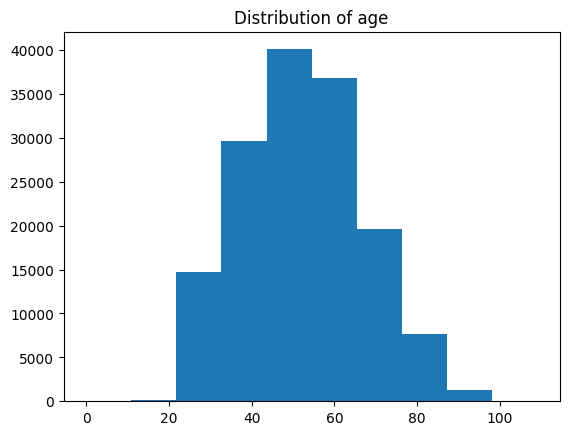

In [7]:
import matplotlib.pyplot as plt

plt.hist(TRAINING['age'])
plt.title('Distribution of age')
plt.show()

Распределение похоже на нормальное с вполне четким видом колокола. Исходя из распределения заполним пропуски средним возрастом:

In [ ]:
mean_age = int(TRAINING['age'].mean())

TRAINING['age'] = TRAINING['age'].replace(0, mean_age)

Посмотрим на признак **MonthlyIncome**. Его можно логически связать с возрастом клиентов.

Разделим клиентов по возрасту на 2 группы: взрослые(*adult*) и пенсионеры(*retiree*).

Невозможно сказать, из какой страны клиенты, поэтому в качестве возраста выхода на пенсию возьмем 63 года.

Затем в посмотрим на распределения **MonthlyIncome** в каждой группе и заполним пропуски.

In [9]:
adult = TRAINING.loc[TRAINING['age'] < 63, 'MonthlyIncome'].dropna().astype(int)
retiree  = TRAINING.loc[TRAINING['age'] >= 63, 'MonthlyIncome'].dropna().astype(int)

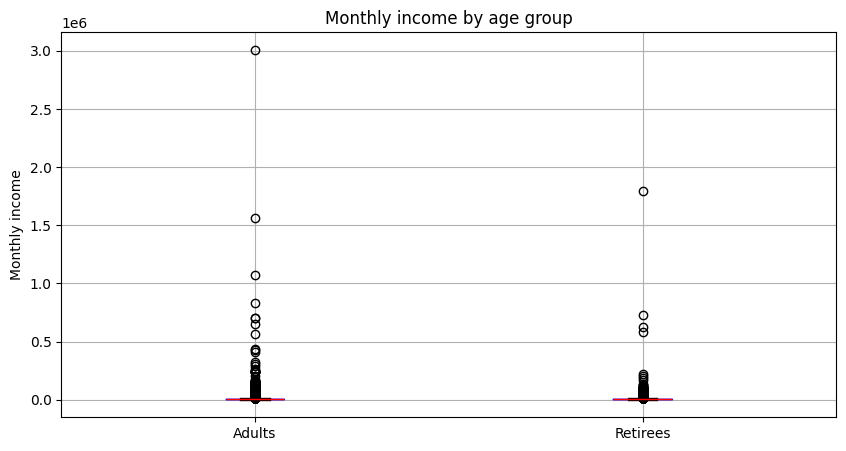

In [10]:
# Построение ящика с усами для ежемесячного дохода двух групп

plt.figure(figsize=(10, 5))
plt.boxplot([
    adult, 
    retiree
    ], tick_labels=["Adults", "Retirees"], medianprops={'color': 'red'}, boxprops={'color': 'blue'})

plt.grid(True)
plt.title("Monthly income by age group")
plt.ylabel("Monthly income")
plt.show()

Получаем, что в среднем доходы клиентов не выше 100.000. Значит, что лучшим решением будет заполнить пропуски медианным значением, так как на среднее будет сильно влиять большое количество выбросов.

In [ ]:
median_monthly_income_adult = TRAINING.loc[TRAINING['age'] < 63, 'MonthlyIncome'].median()
median_monthly_income_retiree = TRAINING.loc[TRAINING['age'] > 63, 'MonthlyIncome'].median()

def fill_median_income(dataframe: pd.DataFrame, median_adult: int|float, median_retiree: int|float):
    dataframe.loc[dataframe['age'] < 63, 'MonthlyIncome'] = dataframe.loc[dataframe['age'] < 63, 'MonthlyIncome'].fillna(median_adult)
    
    dataframe.loc[dataframe['age'] >= 63, 'MonthlyIncome'] = dataframe.loc[dataframe['age'] >= 63, 'MonthlyIncome'].fillna(median_retiree)


fill_median_income(TRAINING, median_adult=median_monthly_income_adult, median_retiree=median_monthly_income_adult)

In [13]:
TRAINING['NumberOfDependents'].value_counts(dropna=False)

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
NaN      3924
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

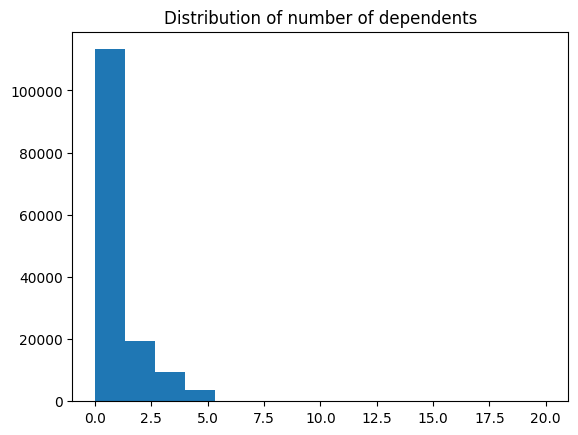

In [14]:
plt.hist(TRAINING['NumberOfDependents'], bins=15)
plt.title('Distribution of number of dependents')
plt.show()

Распределение напоминает логарифмическую кривую, поэтому хорошим вариантом будет заменить NaN модой:

In [15]:
TRAINING.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
median_dependents = TRAINING['NumberOfDependents'].mode()[0]

TRAINING['NumberOfDependents'] = TRAINING['NumberOfDependents'].fillna(median_dependents)

Создадим новые признаки. 

1. Признак **NumberOfDependents** можно интерпретировать как наличие/отсутствие иждивенцев в семье. Добавим признак **HasDependents**.

2. Признаки **NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTimes90DaysLate** и **NumberOfTime60-89DaysPastDueNotWorse** можно интерпретировать как "Задерживал/не задерживал платеж". Добавим признак **HasUnpaidCreditDebts**.

3. Признаки **NumberOfOpenCreditLinesAndLoans** и **NumberRealEstateLoansOrLines** информируют о наличии/отсутствии кредитов. Добавим признак **HasCreditLoanOrLine**

In [ ]:
TRAINING['HasDependents'] = TRAINING['NumberOfDependents'].apply(lambda x: 1 if x > 0 else 0)

TRAINING['HasPastDue'] = TRAINING['NumberOfTime30-59DaysPastDueNotWorse'] + TRAINING['NumberOfTime60-89DaysPastDueNotWorse'] + TRAINING['NumberOfTimes90DaysLate']
TRAINING['HasPastDue'] = TRAINING['HasPastDue'].apply(lambda x: 1 if x > 0 else 0)

TRAINING['HasCreditLoanOrLine'] = TRAINING['NumberOfOpenCreditLinesAndLoans'] + TRAINING['NumberRealEstateLoansOrLines']
TRAINING['HasCreditLoanOrLine'] = TRAINING['HasCreditLoanOrLine'].apply(lambda x: 1 if x > 0 else 0)

Посмотрим на матрицу корреляций:

<Axes: >

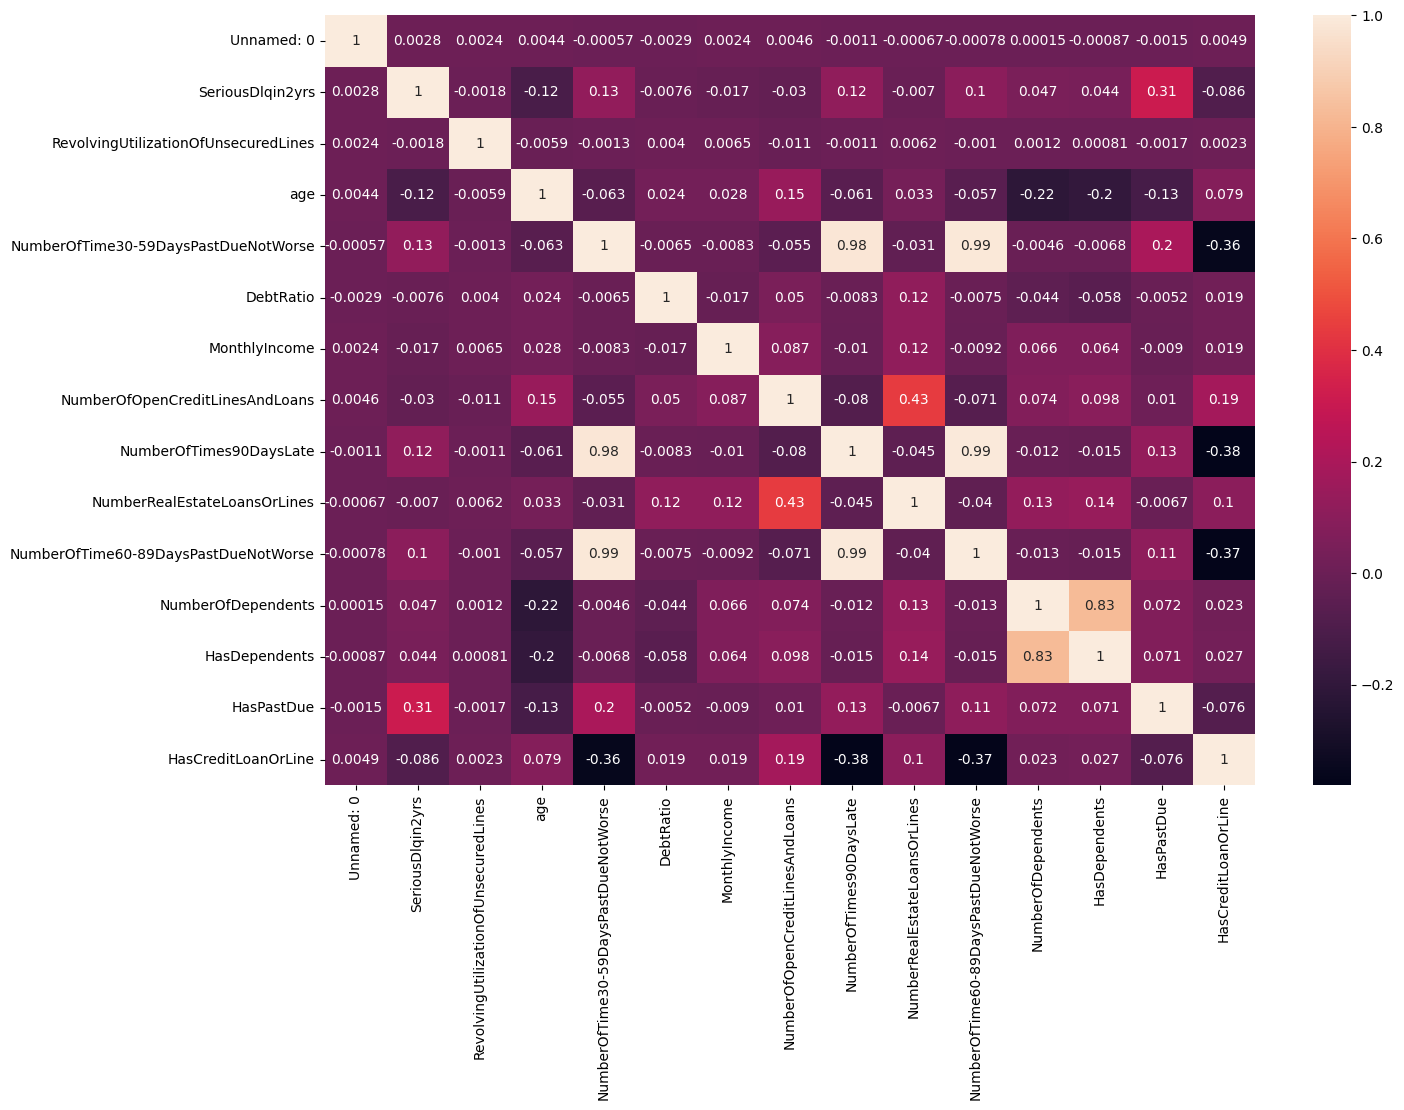

In [20]:
import seaborn as sns

corr = TRAINING.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2g')

С таргетом сильно коррелирует признак **HasUnpaidCreditDebts**. Также можно заметить, что признак **Age** тоже показывает хорошую корреляцию относительно остальных признаков.

Удалим признаки:

1. Количество просроченных выплат, поскольку признак **HasPastDue** удачно комбинирует их
2. **HasDependents**
3. Количество кредитов у клиента, так как признак **HasCreditLoanOrLine** удачно комбинирует их

In [ ]:
columns_to_drop = ['Unnamed: 0', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfOpenCreditLinesAndLoans',
                   'NumberRealEstateLoansOrLines', 'HasDependents']

TRAINING.drop(columns=columns_to_drop, inplace=True)

<Axes: title={'center': 'Clean correlation matrix'}>

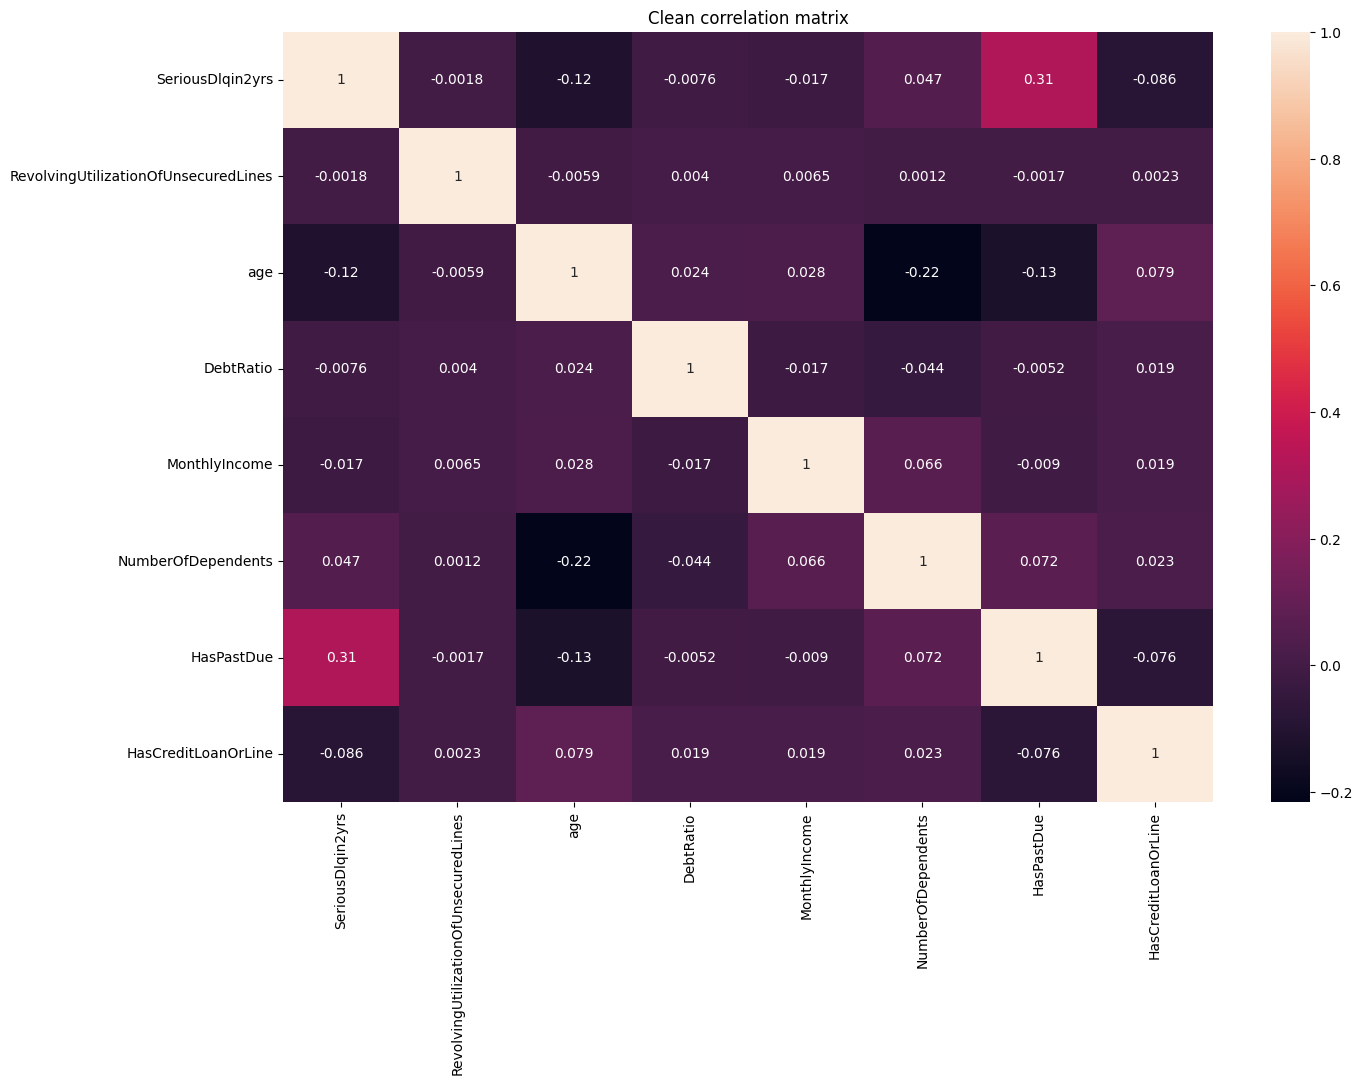

In [22]:
corr = TRAINING.corr()
plt.figure(figsize=(15, 10))
plt.title('Clean correlation matrix')
sns.heatmap(corr, annot=True, fmt='.2g')

In [23]:
TRAINING.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         150000 non-null  float64
 5   NumberOfDependents                    150000 non-null  float64
 6   HasPastDue                            150000 non-null  int64  
 7   HasCreditLoanOrLine                   150000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 9.2 MB


In [ ]:
X_train = TRAINING.drop(columns='SeriousDlqin2yrs')
y_train = TRAINING['SeriousDlqin2yrs']

# Model Training

В качестве модели возьмем логистическую регрессию с L1-регуляризацией, для этого выберем solver 'saga', так как он поддерживает L1-регуляризацию и рассчитан на большие датасеты. Гиперпараметр 'C' подберем с помощью GridSearch, также установим class_weight 'balanced', так как в данных присутствует дисбаланс классов тагрета:

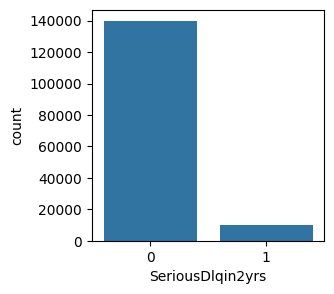

In [25]:
plt.figure(figsize=(3, 3))
sns.countplot(x='SeriousDlqin2yrs', data=TRAINING)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

В качестве метрики выберем f1-score, поскольку нам необходимо в равной степени иметь высокие recall и precision. Также, так как в данных присутсвует дисбаланс классов, f1 в отличие от roc-auc будет честнее оценивать предсказательную способность модели.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
params = {'C': np.arange(0.01, 1, 0.01)}
model = LogisticRegression(solver='saga', penalty='l1', class_weight='balanced')

gs = GridSearchCV(model, params, cv=3, scoring='f1')
gs.fit(X_train_scaled, y_train)

logistic_regression = gs.best_estimator_

In [ ]:
from sklearn.pipeline import Pipeline

pipeline_linear = Pipeline([
    ('Scaler', StandardScaler()),
    ('Model', logistic_regression)
])

score_linear = cross_val_score(pipeline_linear, X_train, y_train, cv=3, scoring='f1').mean()

np.float64(0.33405277348242013)

f1 показывает не самый хороший результат. Попробуем другие модели:

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

RandomForest и GradientBoosting очень зависимы от гиперпараметров, для ускорения их подбора воспользуемся не GridSearch, а Optuna

In [43]:
import optuna

# objective для RandomForest
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, random_state=RANDOM_STATE)
    
    return cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1).mean()

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40, show_progress_bar=True)

score_forest = study.best_value

[I 2025-08-22 14:45:38,554] A new study created in memory with name: no-name-0351b64a-ac70-4c98-83df-f358d92c90aa
Best trial: 0. Best value: 0:   2%|▎         | 1/40 [00:11<07:41, 11.84s/it]

[I 2025-08-22 14:45:50,393] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 482, 'max_depth': 2, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.0.


Best trial: 1. Best value: 0.00337569:   5%|▌         | 2/40 [00:35<12:05, 19.08s/it]

[I 2025-08-22 14:46:14,545] Trial 1 finished with value: 0.003375690918207925 and parameters: {'n_estimators': 469, 'max_depth': 7, 'criterion': 'gini'}. Best is trial 1 with value: 0.003375690918207925.


Best trial: 2. Best value: 0.0736497:   8%|▊         | 3/40 [01:05<14:38, 23.74s/it] 

[I 2025-08-22 14:46:43,831] Trial 2 finished with value: 0.07364974171071162 and parameters: {'n_estimators': 418, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  10%|█         | 4/40 [01:19<11:53, 19.81s/it]

[I 2025-08-22 14:46:57,613] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 493, 'max_depth': 3, 'criterion': 'log_loss'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  12%|█▎        | 5/40 [01:31<09:59, 17.13s/it]

[I 2025-08-22 14:47:10,005] Trial 4 finished with value: 0.05249951526827165 and parameters: {'n_estimators': 201, 'max_depth': 9, 'criterion': 'gini'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  15%|█▌        | 6/40 [01:38<07:49, 13.81s/it]

[I 2025-08-22 14:47:17,348] Trial 5 finished with value: 0.0 and parameters: {'n_estimators': 294, 'max_depth': 2, 'criterion': 'log_loss'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  18%|█▊        | 7/40 [02:00<09:02, 16.44s/it]

[I 2025-08-22 14:47:39,206] Trial 6 finished with value: 0.028630494582029653 and parameters: {'n_estimators': 373, 'max_depth': 8, 'criterion': 'gini'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  20%|██        | 8/40 [02:19<09:06, 17.09s/it]

[I 2025-08-22 14:47:57,689] Trial 7 finished with value: 0.05853520235559314 and parameters: {'n_estimators': 244, 'max_depth': 10, 'criterion': 'log_loss'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  22%|██▎       | 9/40 [02:37<09:04, 17.56s/it]

[I 2025-08-22 14:48:16,291] Trial 8 finished with value: 0.012238150263688949 and parameters: {'n_estimators': 293, 'max_depth': 8, 'criterion': 'log_loss'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  25%|██▌       | 10/40 [02:46<07:24, 14.83s/it]

[I 2025-08-22 14:48:25,008] Trial 9 finished with value: 0.0 and parameters: {'n_estimators': 410, 'max_depth': 2, 'criterion': 'log_loss'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  28%|██▊       | 11/40 [02:48<05:13, 10.82s/it]

[I 2025-08-22 14:48:26,748] Trial 10 finished with value: 0.0 and parameters: {'n_estimators': 37, 'max_depth': 5, 'criterion': 'entropy'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 2. Best value: 0.0736497:  30%|███       | 12/40 [03:02<05:33, 11.92s/it]

[I 2025-08-22 14:48:41,162] Trial 11 finished with value: 0.05784826215770278 and parameters: {'n_estimators': 185, 'max_depth': 10, 'criterion': 'entropy'}. Best is trial 2 with value: 0.07364974171071162.


Best trial: 12. Best value: 0.0782462:  32%|███▎      | 13/40 [03:11<04:55, 10.93s/it]

[I 2025-08-22 14:48:49,814] Trial 12 finished with value: 0.07824615482312405 and parameters: {'n_estimators': 124, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  35%|███▌      | 14/40 [03:14<03:43,  8.60s/it]

[I 2025-08-22 14:48:53,026] Trial 13 finished with value: 0.0 and parameters: {'n_estimators': 73, 'max_depth': 5, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  38%|███▊      | 15/40 [03:22<03:33,  8.55s/it]

[I 2025-08-22 14:49:01,454] Trial 14 finished with value: 0.07768735108409554 and parameters: {'n_estimators': 116, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  40%|████      | 16/40 [03:29<03:13,  8.06s/it]

[I 2025-08-22 14:49:08,379] Trial 15 finished with value: 0.03164823219727748 and parameters: {'n_estimators': 115, 'max_depth': 8, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  42%|████▎     | 17/40 [03:35<02:49,  7.38s/it]

[I 2025-08-22 14:49:14,185] Trial 16 finished with value: 0.0 and parameters: {'n_estimators': 124, 'max_depth': 6, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  45%|████▌     | 18/40 [03:36<01:59,  5.43s/it]

[I 2025-08-22 14:49:15,087] Trial 17 finished with value: 0.05556164857470099 and parameters: {'n_estimators': 12, 'max_depth': 9, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  48%|████▊     | 19/40 [03:47<02:26,  6.99s/it]

[I 2025-08-22 14:49:25,695] Trial 18 finished with value: 0.04480176492386964 and parameters: {'n_estimators': 143, 'max_depth': 9, 'criterion': 'entropy'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  50%|█████     | 20/40 [03:50<02:00,  6.01s/it]

[I 2025-08-22 14:49:29,429] Trial 19 finished with value: 0.0029702567092265617 and parameters: {'n_estimators': 71, 'max_depth': 7, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  52%|█████▎    | 21/40 [03:56<01:54,  6.04s/it]

[I 2025-08-22 14:49:35,537] Trial 20 finished with value: 0.0 and parameters: {'n_estimators': 180, 'max_depth': 4, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  55%|█████▌    | 22/40 [04:22<03:31, 11.75s/it]

[I 2025-08-22 14:50:00,586] Trial 21 finished with value: 0.07594757719447151 and parameters: {'n_estimators': 359, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  57%|█████▊    | 23/40 [04:46<04:23, 15.48s/it]

[I 2025-08-22 14:50:24,774] Trial 22 finished with value: 0.07539996155069349 and parameters: {'n_estimators': 348, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  60%|██████    | 24/40 [05:02<04:09, 15.57s/it]

[I 2025-08-22 14:50:40,557] Trial 23 finished with value: 0.05136406594592414 and parameters: {'n_estimators': 247, 'max_depth': 9, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  62%|██████▎   | 25/40 [05:23<04:20, 17.39s/it]

[I 2025-08-22 14:51:02,191] Trial 24 finished with value: 0.07611485043170603 and parameters: {'n_estimators': 309, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  65%|██████▌   | 26/40 [05:44<04:18, 18.47s/it]

[I 2025-08-22 14:51:23,194] Trial 25 finished with value: 0.039294230793822035 and parameters: {'n_estimators': 288, 'max_depth': 9, 'criterion': 'entropy'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  68%|██████▊   | 27/40 [05:48<03:04, 14.20s/it]

[I 2025-08-22 14:51:27,411] Trial 26 finished with value: 0.004360755042400521 and parameters: {'n_estimators': 79, 'max_depth': 7, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  70%|███████   | 28/40 [05:57<02:31, 12.66s/it]

[I 2025-08-22 14:51:36,502] Trial 27 finished with value: 0.027436609003522846 and parameters: {'n_estimators': 154, 'max_depth': 8, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  72%|███████▎  | 29/40 [06:13<02:28, 13.52s/it]

[I 2025-08-22 14:51:52,013] Trial 28 finished with value: 0.075162948291686 and parameters: {'n_estimators': 220, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  75%|███████▌  | 30/40 [06:37<02:45, 16.57s/it]

[I 2025-08-22 14:52:15,704] Trial 29 finished with value: 0.03998112513654397 and parameters: {'n_estimators': 323, 'max_depth': 9, 'criterion': 'entropy'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  78%|███████▊  | 31/40 [06:41<01:55, 12.87s/it]

[I 2025-08-22 14:52:19,946] Trial 30 finished with value: 0.0 and parameters: {'n_estimators': 89, 'max_depth': 6, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  80%|████████  | 32/40 [07:08<02:16, 17.11s/it]

[I 2025-08-22 14:52:46,940] Trial 31 finished with value: 0.07466232389237999 and parameters: {'n_estimators': 384, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  82%|████████▎ | 33/40 [07:40<02:30, 21.52s/it]

[I 2025-08-22 14:53:18,741] Trial 32 finished with value: 0.07331707462522256 and parameters: {'n_estimators': 452, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  85%|████████▌ | 34/40 [08:04<02:14, 22.35s/it]

[I 2025-08-22 14:53:43,040] Trial 33 finished with value: 0.07683711135768938 and parameters: {'n_estimators': 341, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  88%|████████▊ | 35/40 [08:22<01:44, 20.99s/it]

[I 2025-08-22 14:54:00,845] Trial 34 finished with value: 0.053213819465620545 and parameters: {'n_estimators': 273, 'max_depth': 9, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  90%|█████████ | 36/40 [08:38<01:18, 19.51s/it]

[I 2025-08-22 14:54:16,922] Trial 35 finished with value: 0.07478377947506841 and parameters: {'n_estimators': 225, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  92%|█████████▎| 37/40 [08:57<00:58, 19.54s/it]

[I 2025-08-22 14:54:36,515] Trial 36 finished with value: 0.027665834388860982 and parameters: {'n_estimators': 330, 'max_depth': 8, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  95%|█████████▌| 38/40 [09:23<00:42, 21.41s/it]

[I 2025-08-22 14:55:02,300] Trial 37 finished with value: 0.050280248307428936 and parameters: {'n_estimators': 393, 'max_depth': 9, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462:  98%|█████████▊| 39/40 [09:50<00:22, 22.99s/it]

[I 2025-08-22 14:55:28,981] Trial 38 finished with value: 0.0001994216771363047 and parameters: {'n_estimators': 445, 'max_depth': 7, 'criterion': 'log_loss'}. Best is trial 12 with value: 0.07824615482312405.


Best trial: 12. Best value: 0.0782462: 100%|██████████| 40/40 [10:13<00:00, 15.34s/it]

[I 2025-08-22 14:55:52,181] Trial 39 finished with value: 0.0770093283343397 and parameters: {'n_estimators': 320, 'max_depth': 10, 'criterion': 'gini'}. Best is trial 12 with value: 0.07824615482312405.


In [47]:
# objective для GradientBoosting
def gradient_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 500)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1)
    
    model = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=RANDOM_STATE)
    
    return cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1).mean()

In [ ]:
study_gradient = optuna.create_study(direction='maximize')
study_gradient.optimize(gradient_objective, n_trials=40, show_progress_bar=True)

score_gradient = study_gradient.best_value

[I 2025-08-22 15:02:05,237] A new study created in memory with name: no-name-6b6970e9-b0e2-4d4e-995f-45a2ce837223
Best trial: 0. Best value: 0.134573:   2%|▎         | 1/40 [00:12<07:56, 12.23s/it]

[I 2025-08-22 15:02:17,467] Trial 0 finished with value: 0.1345726363043834 and parameters: {'n_estimators': 54, 'max_depth': 6, 'learning_rate': 0.3347755516192265}. Best is trial 0 with value: 0.1345726363043834.


Best trial: 1. Best value: 0.164139:   5%|▌         | 2/40 [00:56<19:50, 31.33s/it]

[I 2025-08-22 15:03:02,177] Trial 1 finished with value: 0.16413897135542996 and parameters: {'n_estimators': 433, 'max_depth': 3, 'learning_rate': 0.601050182672981}. Best is trial 1 with value: 0.16413897135542996.


Best trial: 2. Best value: 0.24224:   8%|▊         | 3/40 [01:58<27:47, 45.06s/it] 

[I 2025-08-22 15:04:03,572] Trial 2 finished with value: 0.24223979903351264 and parameters: {'n_estimators': 367, 'max_depth': 5, 'learning_rate': 0.9510730767866432}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  10%|█         | 4/40 [02:03<17:33, 29.26s/it]

[I 2025-08-22 15:04:08,603] Trial 3 finished with value: 0.03200191932667275 and parameters: {'n_estimators': 14, 'max_depth': 8, 'learning_rate': 0.09144056924713476}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  12%|█▎        | 5/40 [02:13<13:02, 22.36s/it]

[I 2025-08-22 15:04:18,719] Trial 4 finished with value: 0.18314491893583673 and parameters: {'n_estimators': 37, 'max_depth': 8, 'learning_rate': 0.7485349581537604}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  15%|█▌        | 6/40 [02:43<14:13, 25.09s/it]

[I 2025-08-22 15:04:49,123] Trial 5 finished with value: 0.13107187014761748 and parameters: {'n_estimators': 423, 'max_depth': 2, 'learning_rate': 0.30932531521904305}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  18%|█▊        | 7/40 [03:15<14:56, 27.18s/it]

[I 2025-08-22 15:05:20,596] Trial 6 finished with value: 0.15691879674358822 and parameters: {'n_estimators': 285, 'max_depth': 3, 'learning_rate': 0.6606415316215031}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  20%|██        | 8/40 [03:33<12:56, 24.26s/it]

[I 2025-08-22 15:05:38,621] Trial 7 finished with value: 0.15445957043593886 and parameters: {'n_estimators': 168, 'max_depth': 3, 'learning_rate': 0.9634711718279534}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  22%|██▎       | 9/40 [05:07<23:48, 46.08s/it]

[I 2025-08-22 15:07:12,686] Trial 8 finished with value: 0.19925057539929422 and parameters: {'n_estimators': 383, 'max_depth': 7, 'learning_rate': 0.556721110849524}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  25%|██▌       | 10/40 [05:10<16:26, 32.88s/it]

[I 2025-08-22 15:07:15,986] Trial 9 finished with value: 0.12778706659144767 and parameters: {'n_estimators': 42, 'max_depth': 2, 'learning_rate': 0.5625421965960294}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  28%|██▊       | 11/40 [07:08<28:26, 58.86s/it]

[I 2025-08-22 15:09:13,757] Trial 10 finished with value: 0.20136080664370404 and parameters: {'n_estimators': 321, 'max_depth': 10, 'learning_rate': 0.9108423405944163}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  30%|███       | 12/40 [08:04<27:00, 57.86s/it]

[I 2025-08-22 15:10:09,328] Trial 11 finished with value: 0.15572811368633152 and parameters: {'n_estimators': 308, 'max_depth': 5, 'learning_rate': 0.973245081284498}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  32%|███▎      | 13/40 [09:17<28:08, 62.55s/it]

[I 2025-08-22 15:11:22,673] Trial 12 finished with value: 0.20516635668349578 and parameters: {'n_estimators': 201, 'max_depth': 10, 'learning_rate': 0.8417562625285573}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  35%|███▌      | 14/40 [10:30<28:28, 65.72s/it]

[I 2025-08-22 15:12:35,721] Trial 13 finished with value: 0.20597036350790168 and parameters: {'n_estimators': 201, 'max_depth': 10, 'learning_rate': 0.7994271290593364}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  38%|███▊      | 15/40 [11:57<30:03, 72.15s/it]

[I 2025-08-22 15:14:02,774] Trial 14 finished with value: 0.19204766881691582 and parameters: {'n_estimators': 486, 'max_depth': 5, 'learning_rate': 0.7959281421208413}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  40%|████      | 16/40 [12:34<24:34, 61.42s/it]

[I 2025-08-22 15:14:39,275] Trial 15 finished with value: 0.16587939523639939 and parameters: {'n_estimators': 199, 'max_depth': 5, 'learning_rate': 0.40446518636348133}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  42%|████▎     | 17/40 [13:16<21:19, 55.64s/it]

[I 2025-08-22 15:15:21,470] Trial 16 finished with value: 0.2012781364019006 and parameters: {'n_estimators': 132, 'max_depth': 9, 'learning_rate': 0.7140674138818207}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 2. Best value: 0.24224:  45%|████▌     | 18/40 [14:36<23:09, 63.16s/it]

[I 2025-08-22 15:16:42,133] Trial 17 finished with value: 0.19458698462079616 and parameters: {'n_estimators': 381, 'max_depth': 6, 'learning_rate': 0.8617682711712138}. Best is trial 2 with value: 0.24223979903351264.


Best trial: 18. Best value: 0.330676:  48%|████▊     | 19/40 [15:14<19:22, 55.35s/it]

[I 2025-08-22 15:17:19,282] Trial 18 finished with value: 0.3306758868878951 and parameters: {'n_estimators': 259, 'max_depth': 4, 'learning_rate': 0.9939270897472168}. Best is trial 18 with value: 0.3306758868878951.


Best trial: 18. Best value: 0.330676:  50%|█████     | 20/40 [15:52<16:43, 50.17s/it]

[I 2025-08-22 15:17:57,395] Trial 19 finished with value: 0.2623450543801059 and parameters: {'n_estimators': 265, 'max_depth': 4, 'learning_rate': 0.9935313327217242}. Best is trial 18 with value: 0.3306758868878951.


Best trial: 18. Best value: 0.330676:  52%|█████▎    | 21/40 [16:29<14:38, 46.23s/it]

[I 2025-08-22 15:18:34,444] Trial 20 finished with value: 0.11490082509095186 and parameters: {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.03809624923933097}. Best is trial 18 with value: 0.3306758868878951.


Best trial: 18. Best value: 0.330676:  55%|█████▌    | 22/40 [17:19<14:14, 47.46s/it]

[I 2025-08-22 15:19:24,757] Trial 21 finished with value: 0.15149156993868704 and parameters: {'n_estimators': 350, 'max_depth': 4, 'learning_rate': 0.968977890627949}. Best is trial 18 with value: 0.3306758868878951.


Best trial: 22. Best value: 0.35466:  57%|█████▊    | 23/40 [17:59<12:47, 45.17s/it] 

[I 2025-08-22 15:20:04,586] Trial 22 finished with value: 0.3546596914147786 and parameters: {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.9873529639097314}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  60%|██████    | 24/40 [18:37<11:29, 43.09s/it]

[I 2025-08-22 15:20:42,826] Trial 23 finished with value: 0.16490718195757367 and parameters: {'n_estimators': 257, 'max_depth': 4, 'learning_rate': 0.8829195395044012}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  62%|██████▎   | 25/40 [19:14<10:16, 41.10s/it]

[I 2025-08-22 15:21:19,283] Trial 24 finished with value: 0.3307501500926835 and parameters: {'n_estimators': 252, 'max_depth': 4, 'learning_rate': 0.9982039771958569}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  65%|██████▌   | 26/40 [19:29<07:47, 33.42s/it]

[I 2025-08-22 15:21:34,775] Trial 25 finished with value: 0.1375496597911318 and parameters: {'n_estimators': 141, 'max_depth': 3, 'learning_rate': 0.6954425651314162}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  68%|██████▊   | 27/40 [19:47<06:14, 28.80s/it]

[I 2025-08-22 15:21:52,798] Trial 26 finished with value: 0.1373246261409187 and parameters: {'n_estimators': 239, 'max_depth': 2, 'learning_rate': 0.8791330177841732}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  70%|███████   | 28/40 [21:03<08:36, 43.00s/it]

[I 2025-08-22 15:23:08,948] Trial 27 finished with value: 0.19419714772892818 and parameters: {'n_estimators': 305, 'max_depth': 7, 'learning_rate': 0.4556212975657499}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  72%|███████▎  | 29/40 [21:35<07:17, 39.77s/it]

[I 2025-08-22 15:23:41,180] Trial 28 finished with value: 0.128928517709195 and parameters: {'n_estimators': 223, 'max_depth': 4, 'learning_rate': 0.21478108708271387}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  75%|███████▌  | 30/40 [21:55<05:38, 33.82s/it]

[I 2025-08-22 15:24:01,116] Trial 29 finished with value: 0.17949329197274144 and parameters: {'n_estimators': 93, 'max_depth': 6, 'learning_rate': 0.7829008231803357}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  78%|███████▊  | 31/40 [23:08<06:49, 45.52s/it]

[I 2025-08-22 15:25:13,938] Trial 30 finished with value: 0.2030598982008999 and parameters: {'n_estimators': 340, 'max_depth': 6, 'learning_rate': 0.9095471142403315}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  80%|████████  | 32/40 [23:47<05:48, 43.60s/it]

[I 2025-08-22 15:25:53,057] Trial 31 finished with value: 0.3294885912918451 and parameters: {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.9983635154171334}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  82%|████████▎ | 33/40 [24:18<04:39, 39.86s/it]

[I 2025-08-22 15:26:24,188] Trial 32 finished with value: 0.1680923621196897 and parameters: {'n_estimators': 282, 'max_depth': 3, 'learning_rate': 0.9871308936525786}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  85%|████████▌ | 34/40 [24:51<03:45, 37.54s/it]

[I 2025-08-22 15:26:56,315] Trial 33 finished with value: 0.24022506883769545 and parameters: {'n_estimators': 178, 'max_depth': 5, 'learning_rate': 0.9302147796439589}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  88%|████████▊ | 35/40 [25:24<03:01, 36.22s/it]

[I 2025-08-22 15:27:29,456] Trial 34 finished with value: 0.1737760863632626 and parameters: {'n_estimators': 228, 'max_depth': 4, 'learning_rate': 0.8254058376770421}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  90%|█████████ | 36/40 [26:15<02:43, 40.80s/it]

[I 2025-08-22 15:28:20,941] Trial 35 finished with value: 0.1788161927164855 and parameters: {'n_estimators': 280, 'max_depth': 5, 'learning_rate': 0.6361588924782048}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  92%|█████████▎| 37/40 [26:52<01:59, 39.69s/it]

[I 2025-08-22 15:28:58,036] Trial 36 finished with value: 0.16975989327790897 and parameters: {'n_estimators': 336, 'max_depth': 3, 'learning_rate': 0.9962220911234871}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  95%|█████████▌| 38/40 [27:24<01:14, 37.21s/it]

[I 2025-08-22 15:29:29,469] Trial 37 finished with value: 0.15165676443346965 and parameters: {'n_estimators': 412, 'max_depth': 2, 'learning_rate': 0.9195926045780289}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466:  98%|█████████▊| 39/40 [27:56<00:35, 35.88s/it]

[I 2025-08-22 15:30:02,225] Trial 38 finished with value: 0.15816518334664947 and parameters: {'n_estimators': 294, 'max_depth': 3, 'learning_rate': 0.745930143496941}. Best is trial 22 with value: 0.3546596914147786.


Best trial: 22. Best value: 0.35466: 100%|██████████| 40/40 [28:31<00:00, 42.78s/it]

[I 2025-08-22 15:30:36,536] Trial 39 finished with value: 0.15836972043344508 and parameters: {'n_estimators': 137, 'max_depth': 7, 'learning_rate': 0.2044964003401467}. Best is trial 22 with value: 0.3546596914147786.


In [ ]:
sv = SVC(class_weight='balanced', kernel='linear')

score_sv = cross_val_score(sv, X_train_scaled, y_train, cv=3, scoring='f1').mean()

In [40]:
knn = KNeighborsClassifier()

params = {'n_neighbors': np.arange(2, 20)}
gs = GridSearchCV(knn, params, cv=3, scoring='f1')

gs.fit(X_train_scaled, y_train)

knn = gs.best_estimator_

In [ ]:
score_knn = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='f1').mean()

In [65]:
scores = {'Logistic Regression': score_linear, 'Random Forest': score_forest, 'Gradient Boosting': score_gradient, 'Support Vector': score_sv, 'KNN': score_knn}

scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))

for metric, score in scores.items():
    print(f'{metric}: {score}')

Gradient Boosting: 0.35466
Logistic Regression: 0.33405277348242013
Support Vector: 0.3330587507547422
KNN: 0.15878918615453852
Random Forest: 0.0782462


Наилучший результат показывает градиентный бустинг

In [69]:
gradient_params = {'n_estimators': 269, 'max_depth': 4, 'learning_rate': 0.9873529639097314}

model = GradientBoostingClassifier(**gradient_params, random_state=RANDOM_STATE)

model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.9873529639097314
,n_estimators,269
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,4
,min_impurity_decrease,0.0
,init,None


In [70]:
import pickle

with open('model.pkl', 'bw') as file:
    pickle.dump(model, file=file)